# RL experiment for Φ = 0.3, Ψ = 0.3
Compared to Φ = 0.1, Ψ = 0.1, the gyrotactic particles should move slightly faster and tend to align less often with the streamlines. In a sense, both of these allow for more net vertical migration since these factors allow the particles to more easily escape vortices. 

In [27]:
%run main.ipynb

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [6]:
my_Φ = 0.3 # swimming number = v_s/u_0       
my_Ψ = 0.3  # stability number = B w_0. B is the characteristic time a perturbed cell takes to return 
            # to orientation ka if w = 0. smaller means swimming more aligned with ka. 
my_alpha0 = 1.0 
method = "expSARSA"
eps_decay = True
my_eps0 = 1.0
my_omega = 1.0 

In [7]:
Q, Σ, smart, naive, hist_R_tot_smart, hist_R_tot_naive, smart_stored_histories, naive_stored_histories, \
        state_action_counter, chosen_actions, avg_Q_hist, initial_coords, theta_history \
            = training(alpha0=my_alpha0, Φ=my_Φ, Ψ=my_Ψ, method=method, eps0=my_eps0, \
                       eps_decay=eps_decay, omega=my_omega)

In [11]:
# directory for saving figures files
directory_name = "phi_0d3_psi_0d3_expSARSA"
create_figure_dir(directory_name)

## Performance metrics

In [14]:
# check performance after training this agent with this set of parameters
plot_total_reward_vs_episode(hist_R_tot_smart, hist_R_tot_naive, N = 1500)

Another way to quanity the performance is through the learning gain, our the % increase in performance of the smart particle relative to that of the naive. 

In [18]:
plot_learning_gain(hist_R_tot_smart, hist_R_tot_naive, N = 2000)

## Selected trajectories

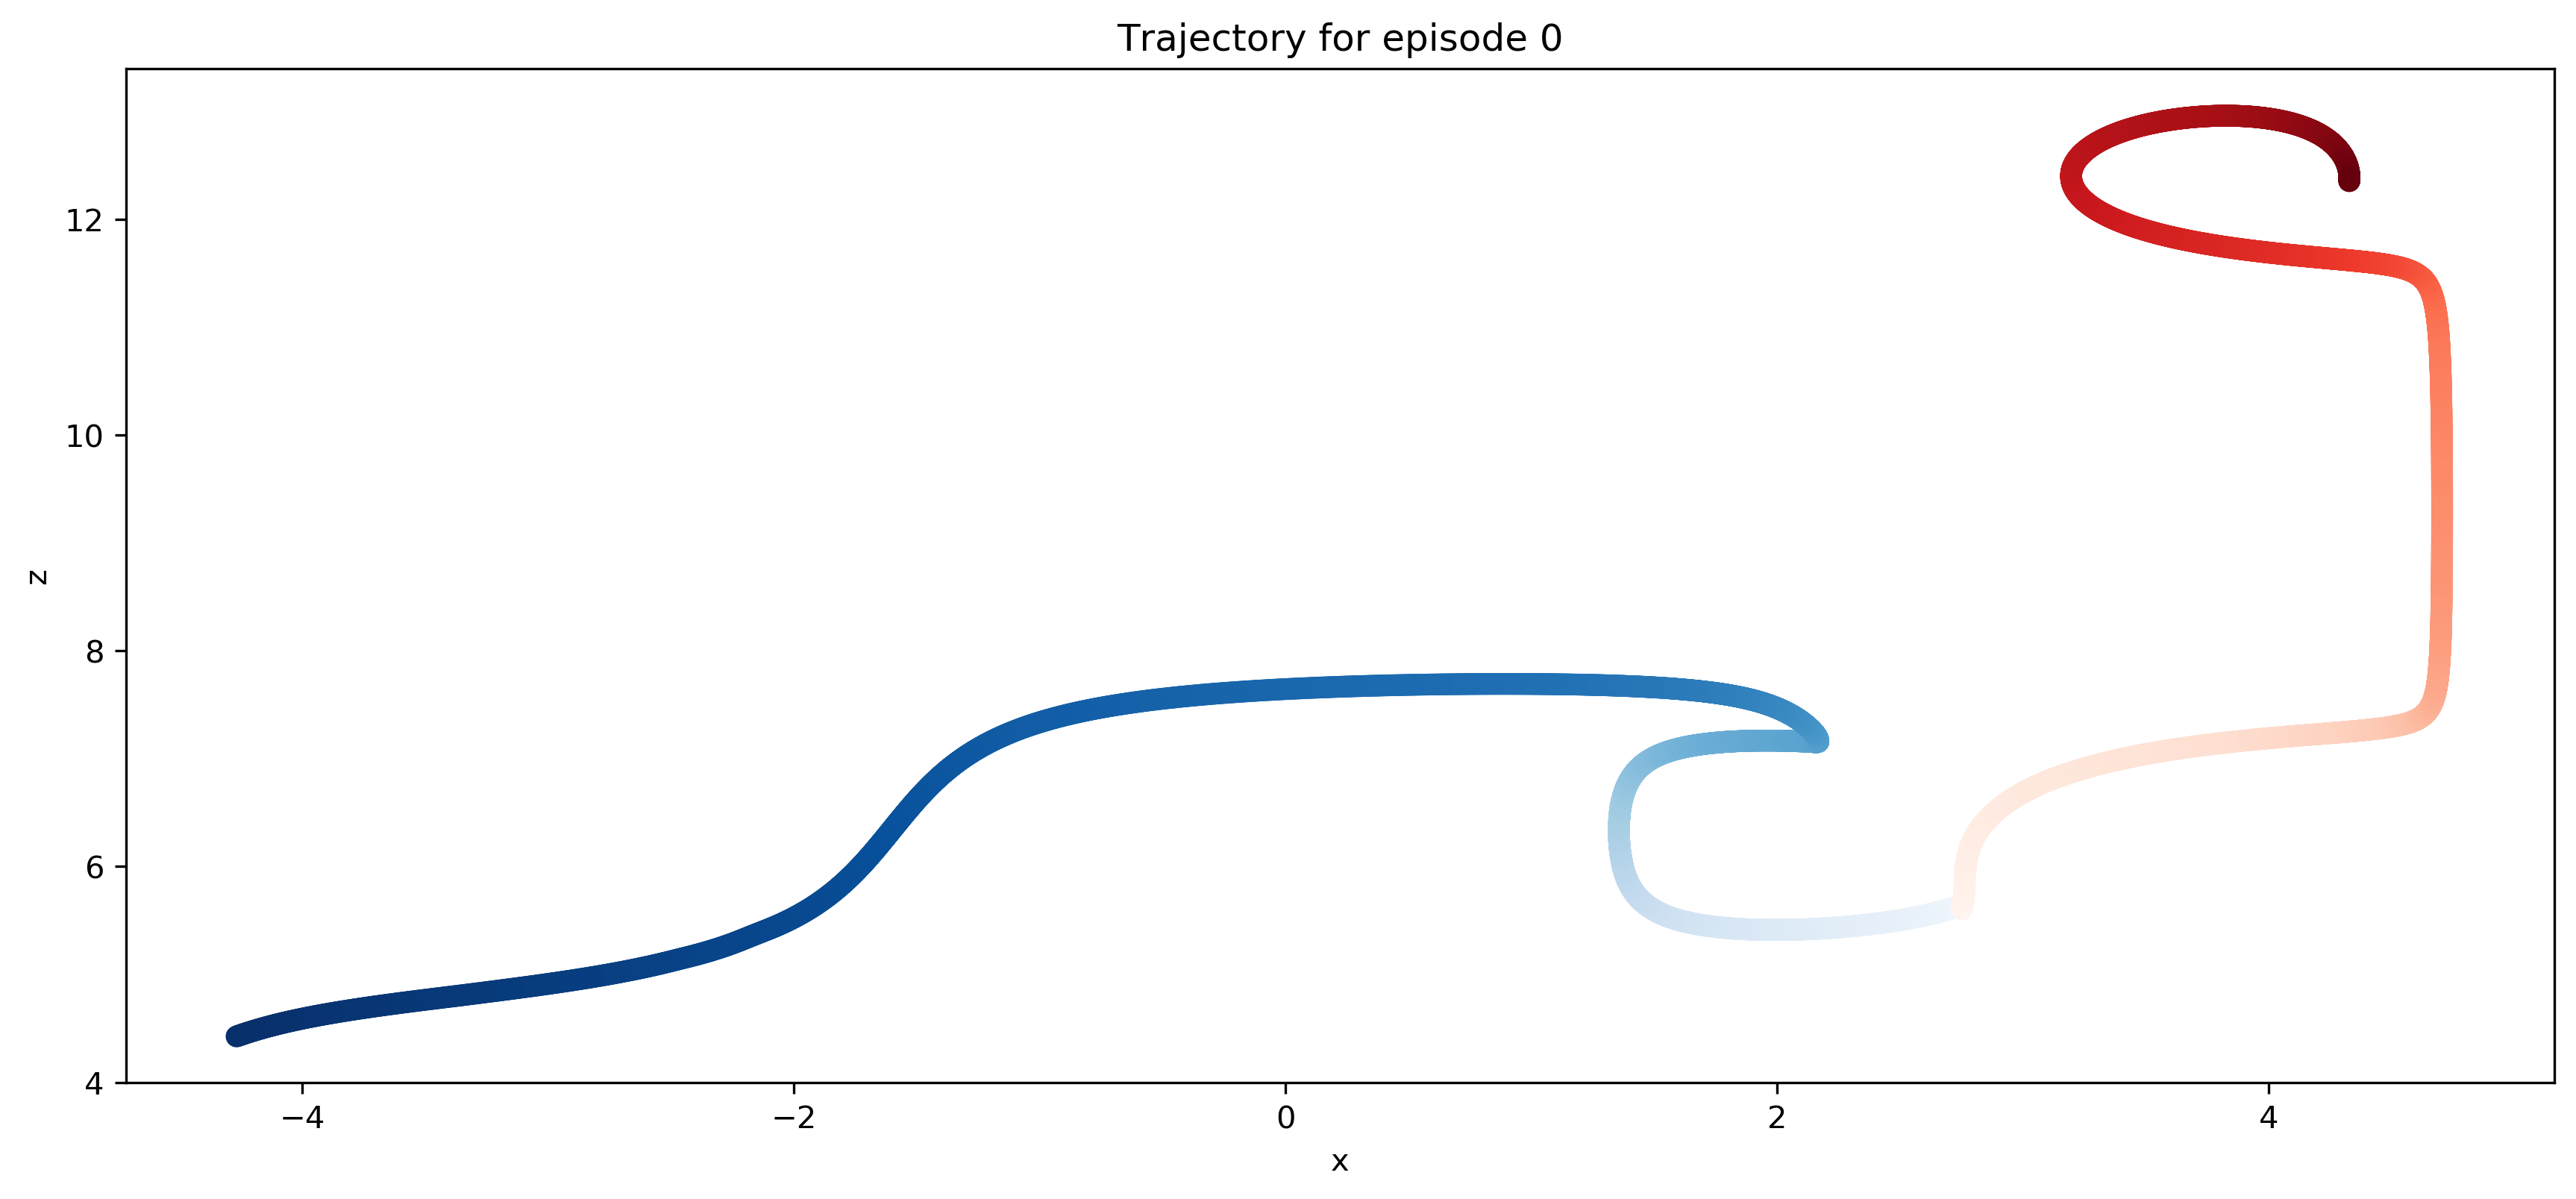

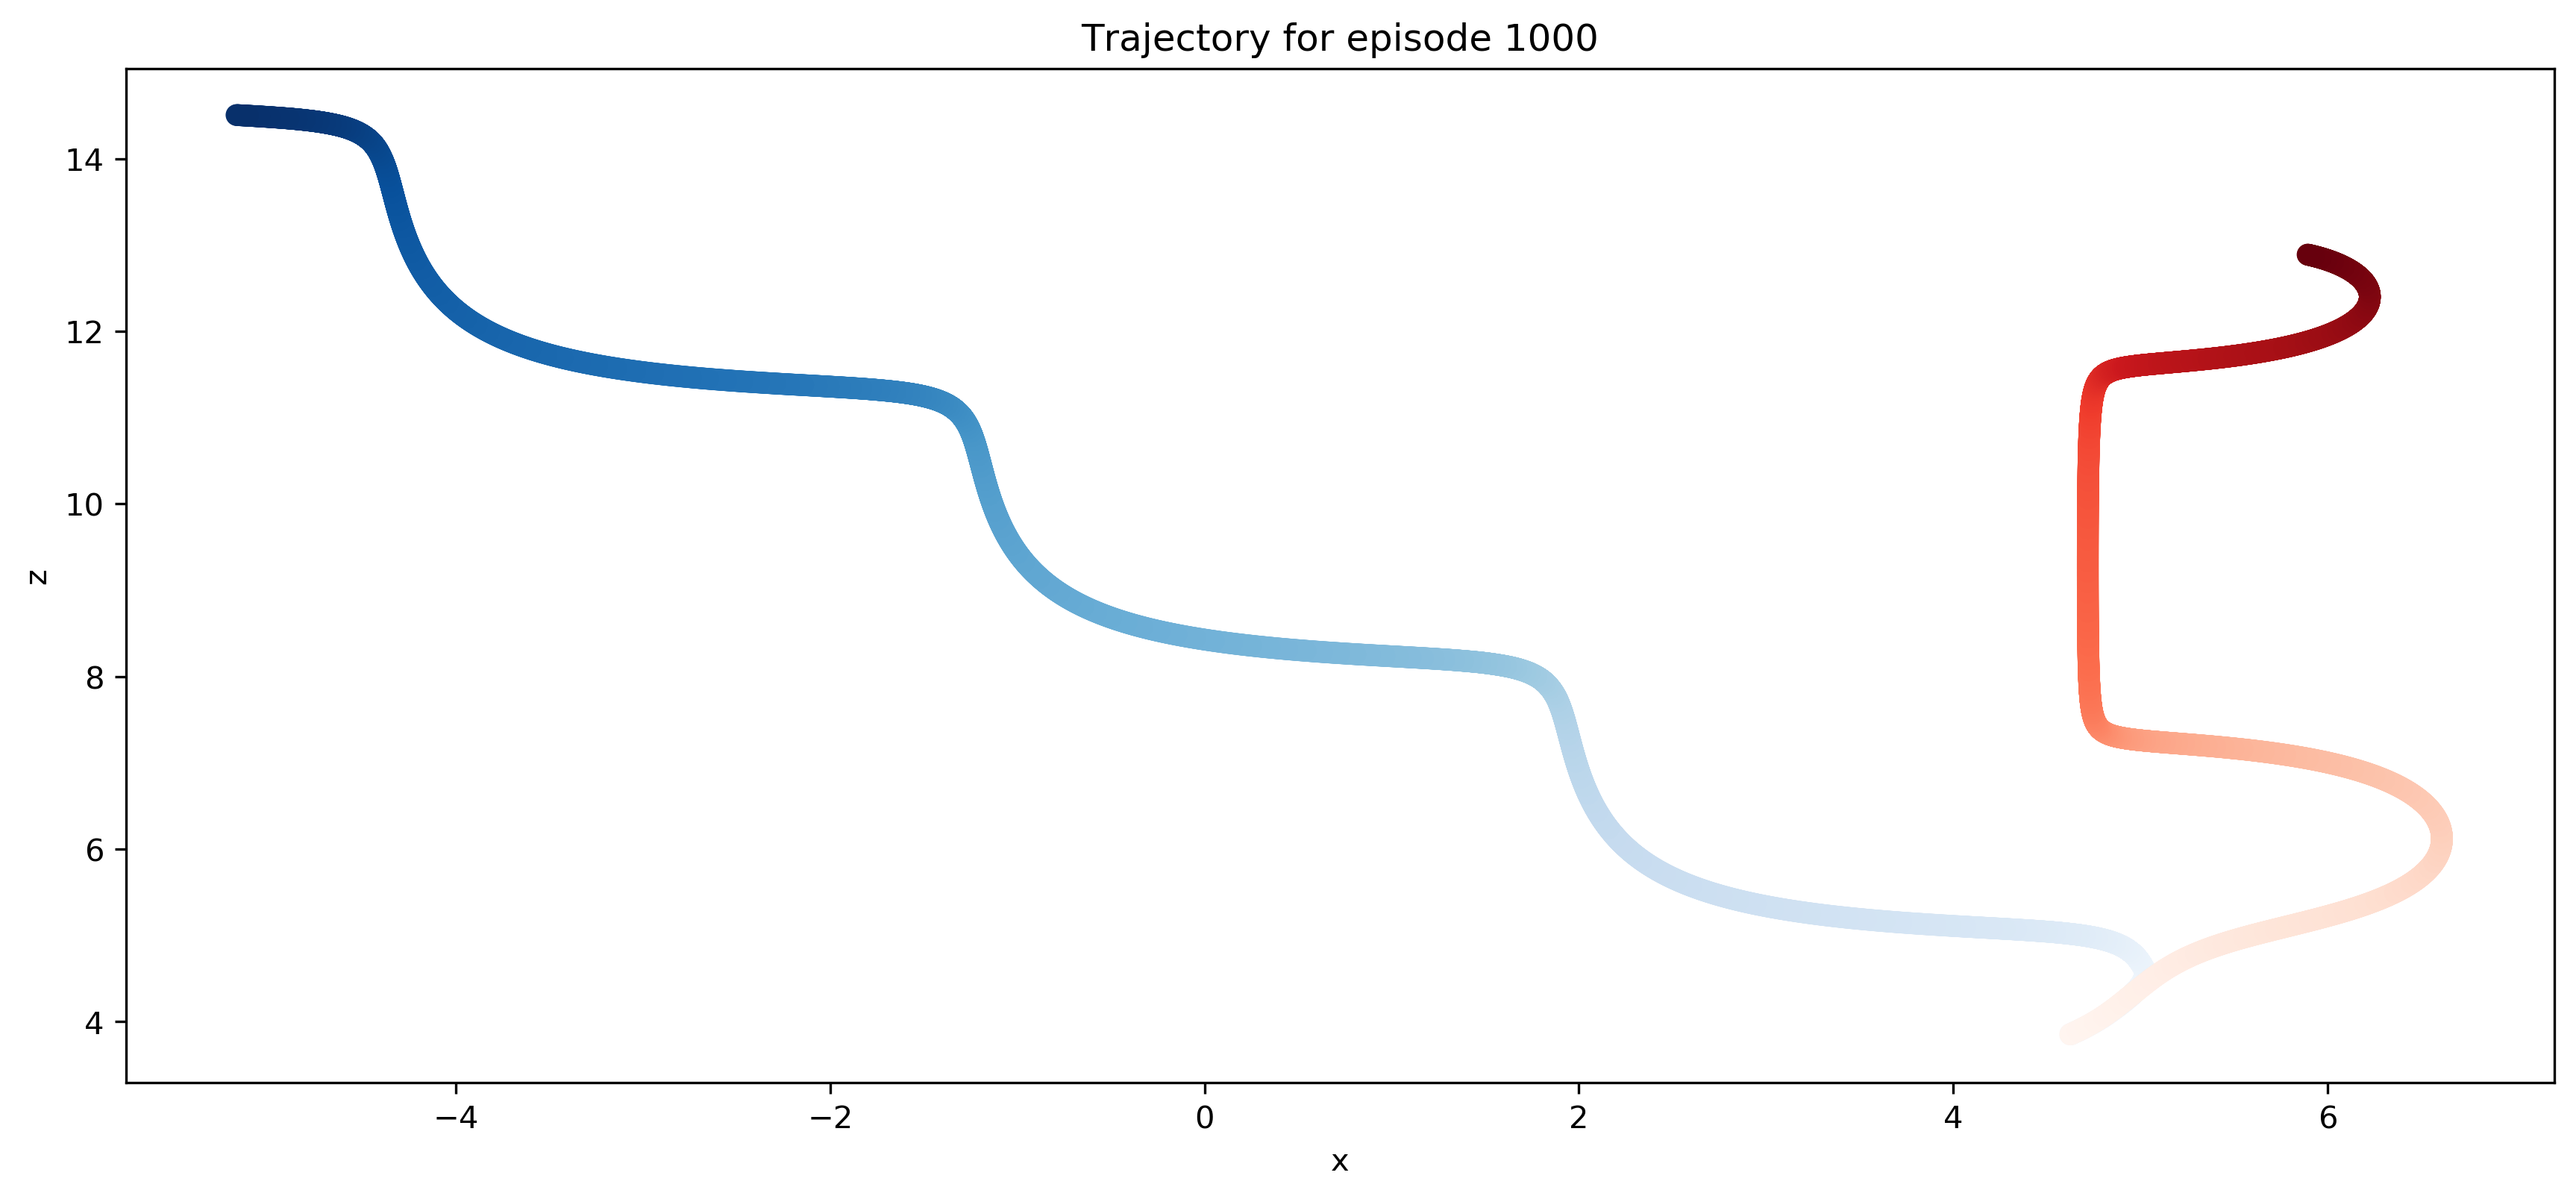

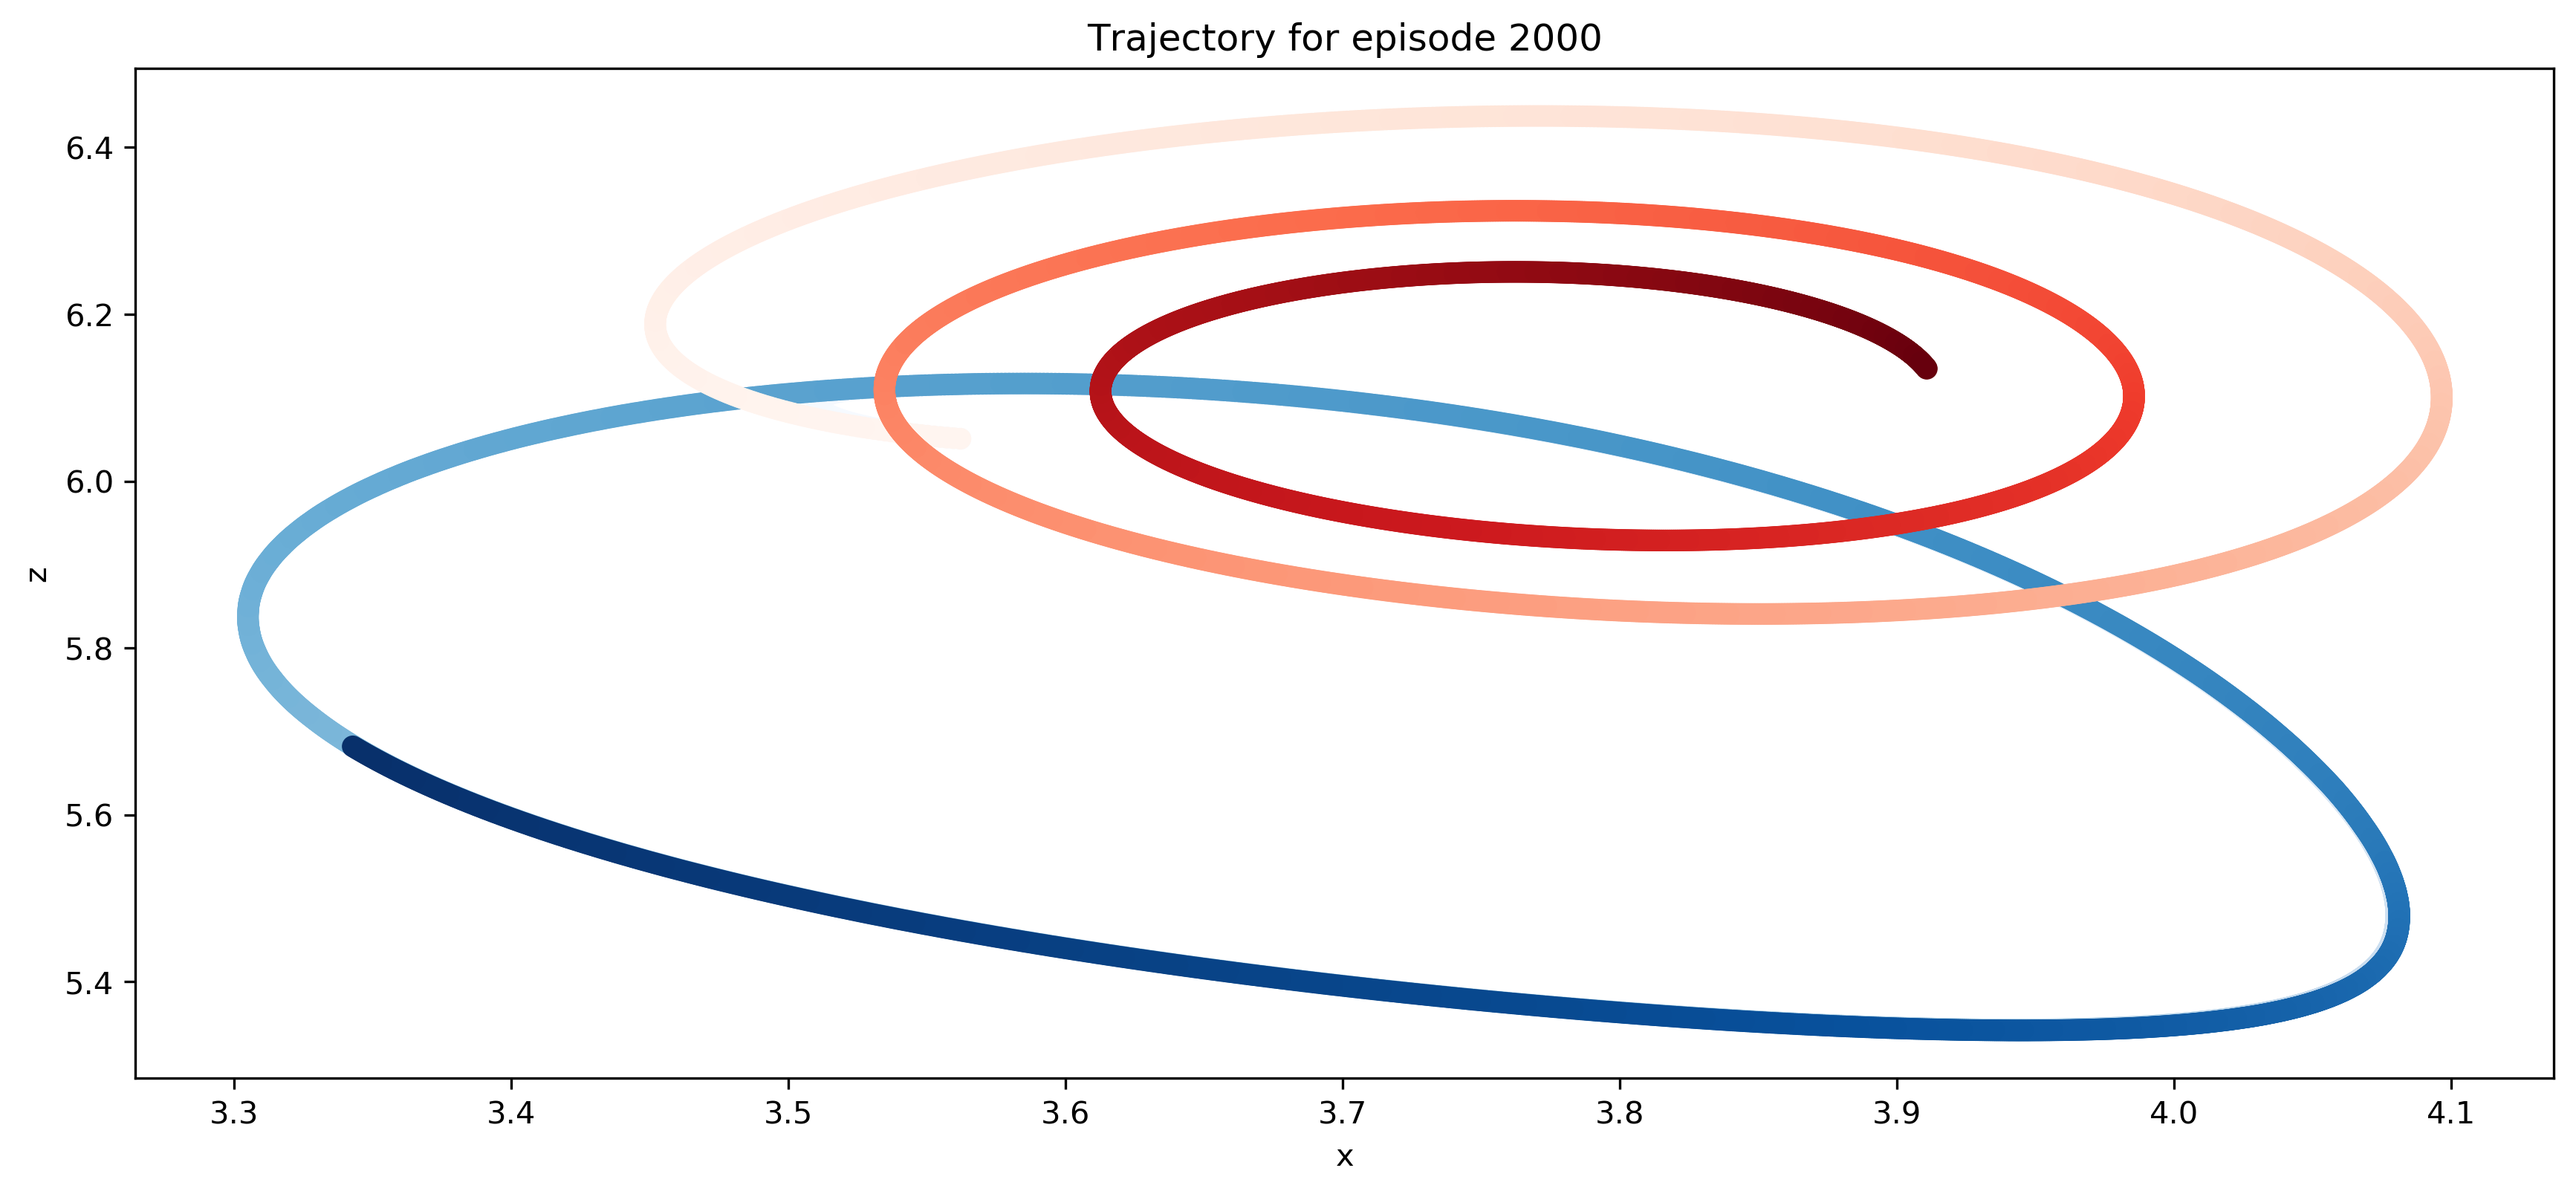

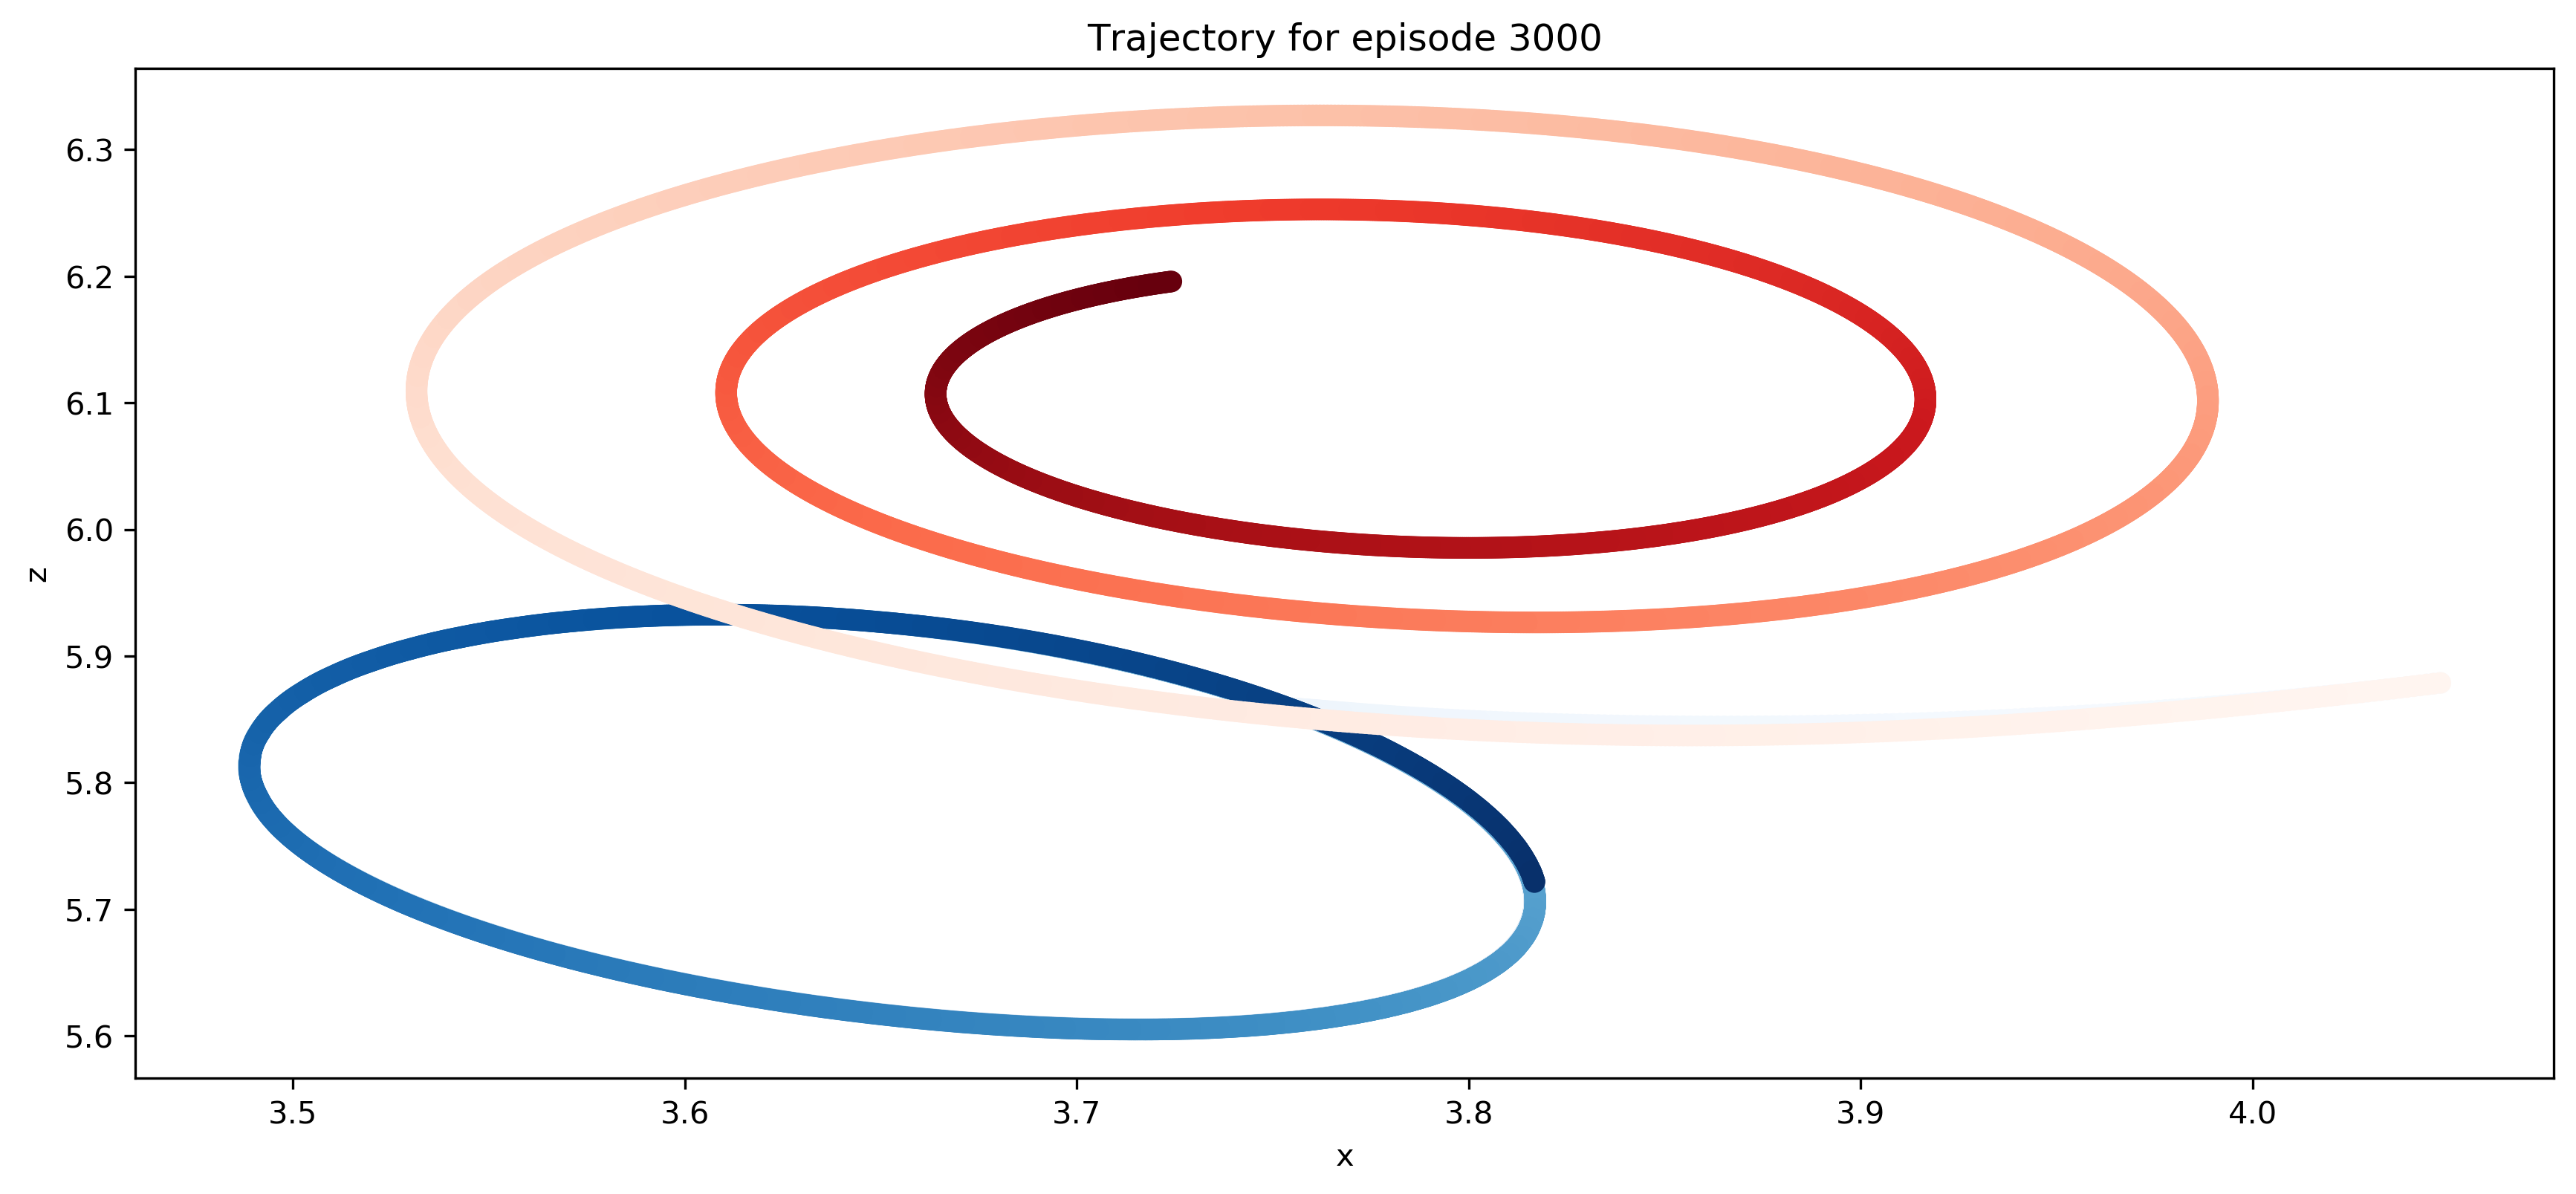

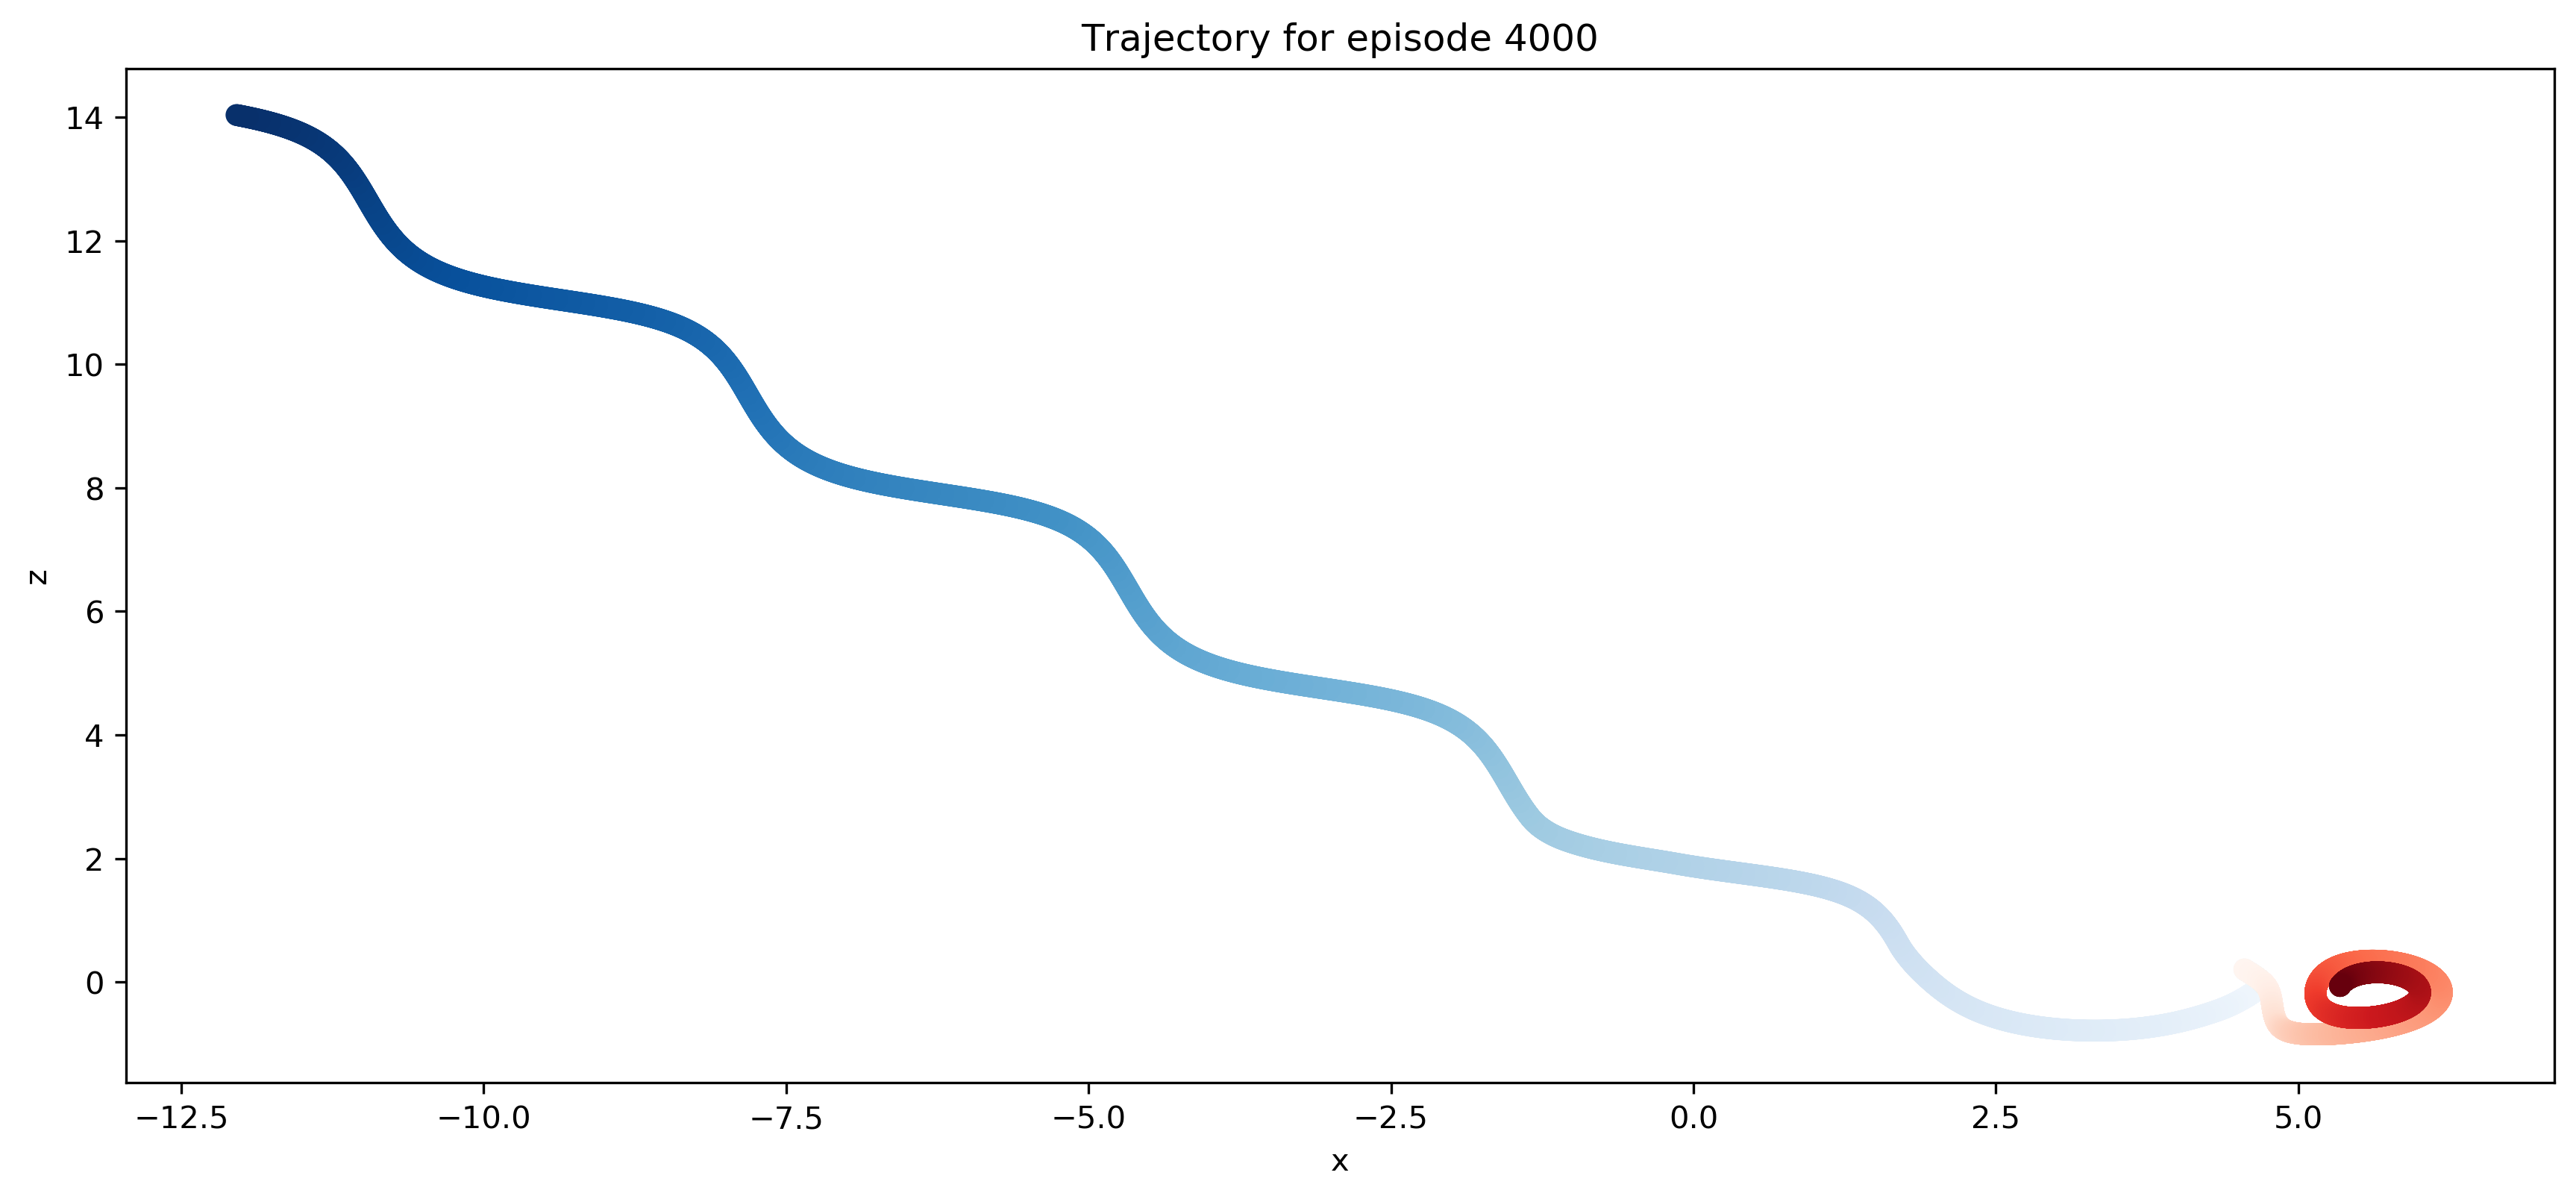

In [39]:
plot_select_trajectories(smart_stored_histories, naive_stored_histories)

## Learned policy

To visualize the policy learned in this case, we can alculate the matrix Qnorm, which is Q but each of its rows is normalized so as to range from 0 to 1. In this way, we can visualize the best action (column) for each state (row).

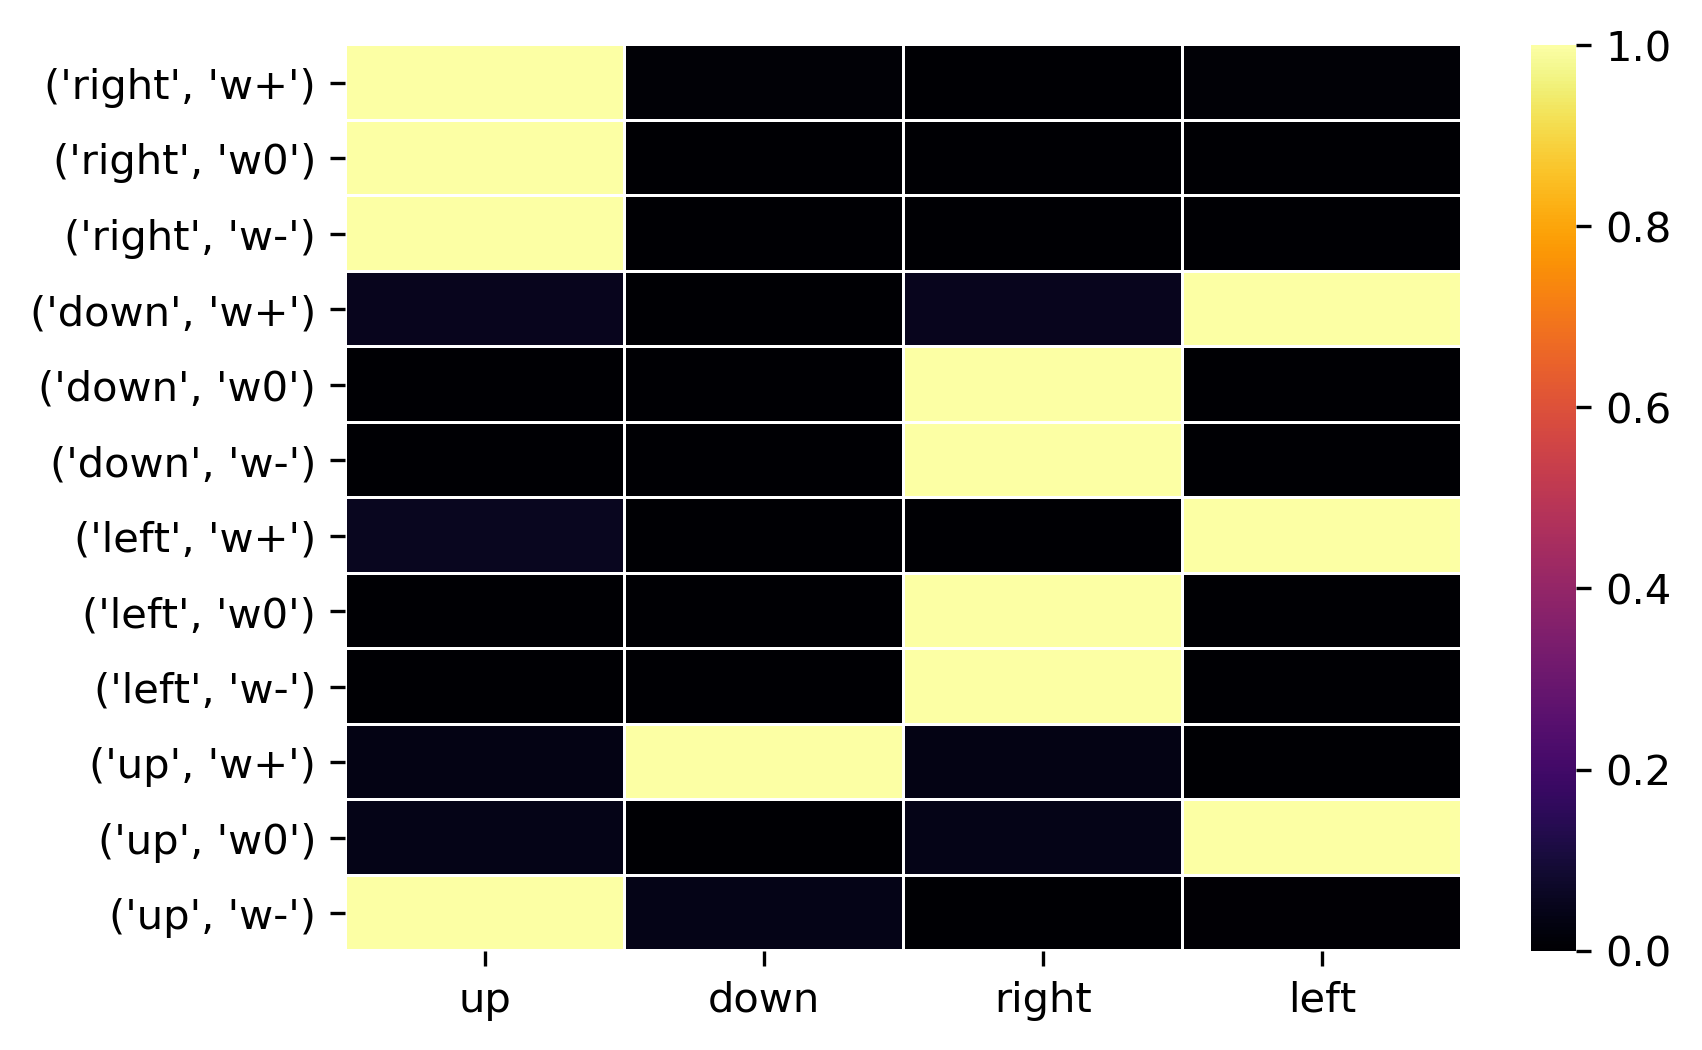

In [41]:
# plt.figure(figsize=(3,2))
Qnorm = copy.deepcopy(Q)
max_per_row = np.max(Q,1)
min_per_row = np.min(Q,1)
for row in range(Q.shape[0]):
    Qnorm[row,:] = (Qnorm[row,:]-min_per_row[row])/(max_per_row[row]-min_per_row[row])
ax = sns.heatmap(Qnorm, linewidth=0.5, xticklabels = ["up","down","right","left"], yticklabels = product_states, \
                cmap = 'inferno')
plt.savefig("Figures/" + directory_name + "/final-policy.pdf", format="pdf", bbox_inches="tight")
plt.show()
# print(Q)
# print(Qnorm)

Of course we can also visualize Q directly to a sense of the relative value of the state-action pairs.

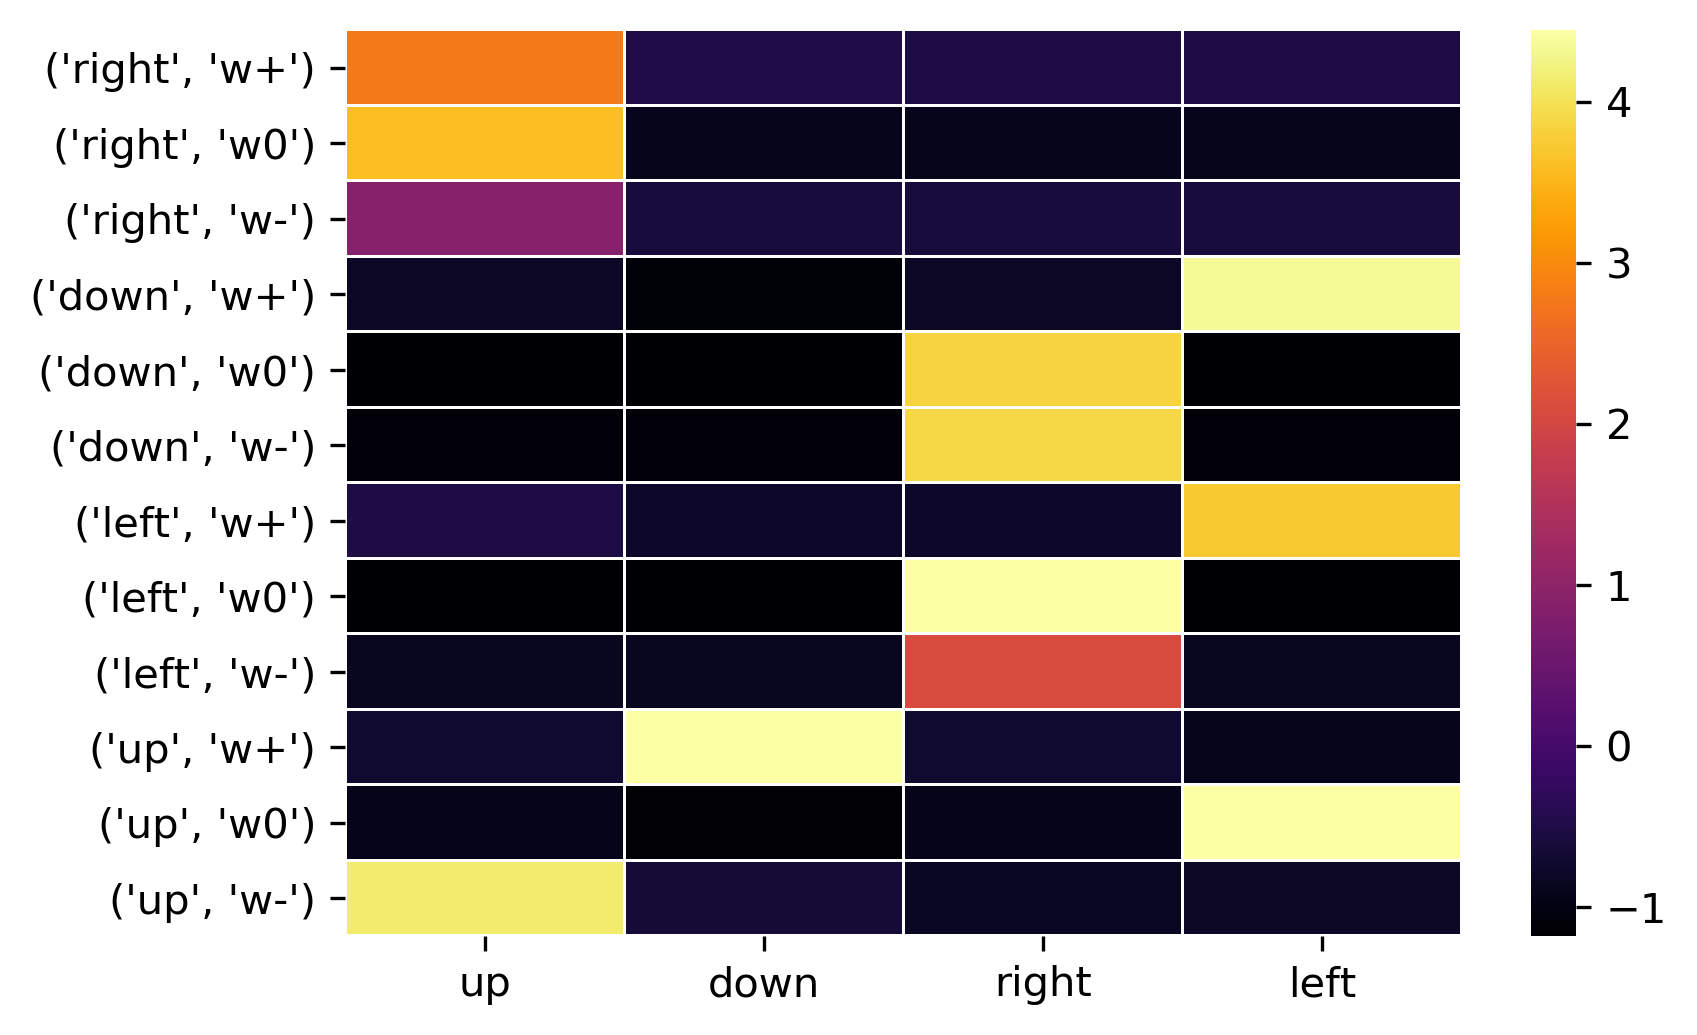

In [42]:
ax = sns.heatmap(Q, linewidth=0.5, xticklabels = ["up","down","right","left"], yticklabels = product_states, \
                cmap = 'inferno')
plt.savefig("Figures/" + directory_name + "/final-policy-unnorm.pdf", format="pdf",  bbox_inches="tight")

Another way we can visualize the "optimal" policy is to overlay the actions taken on the periodic flow field:

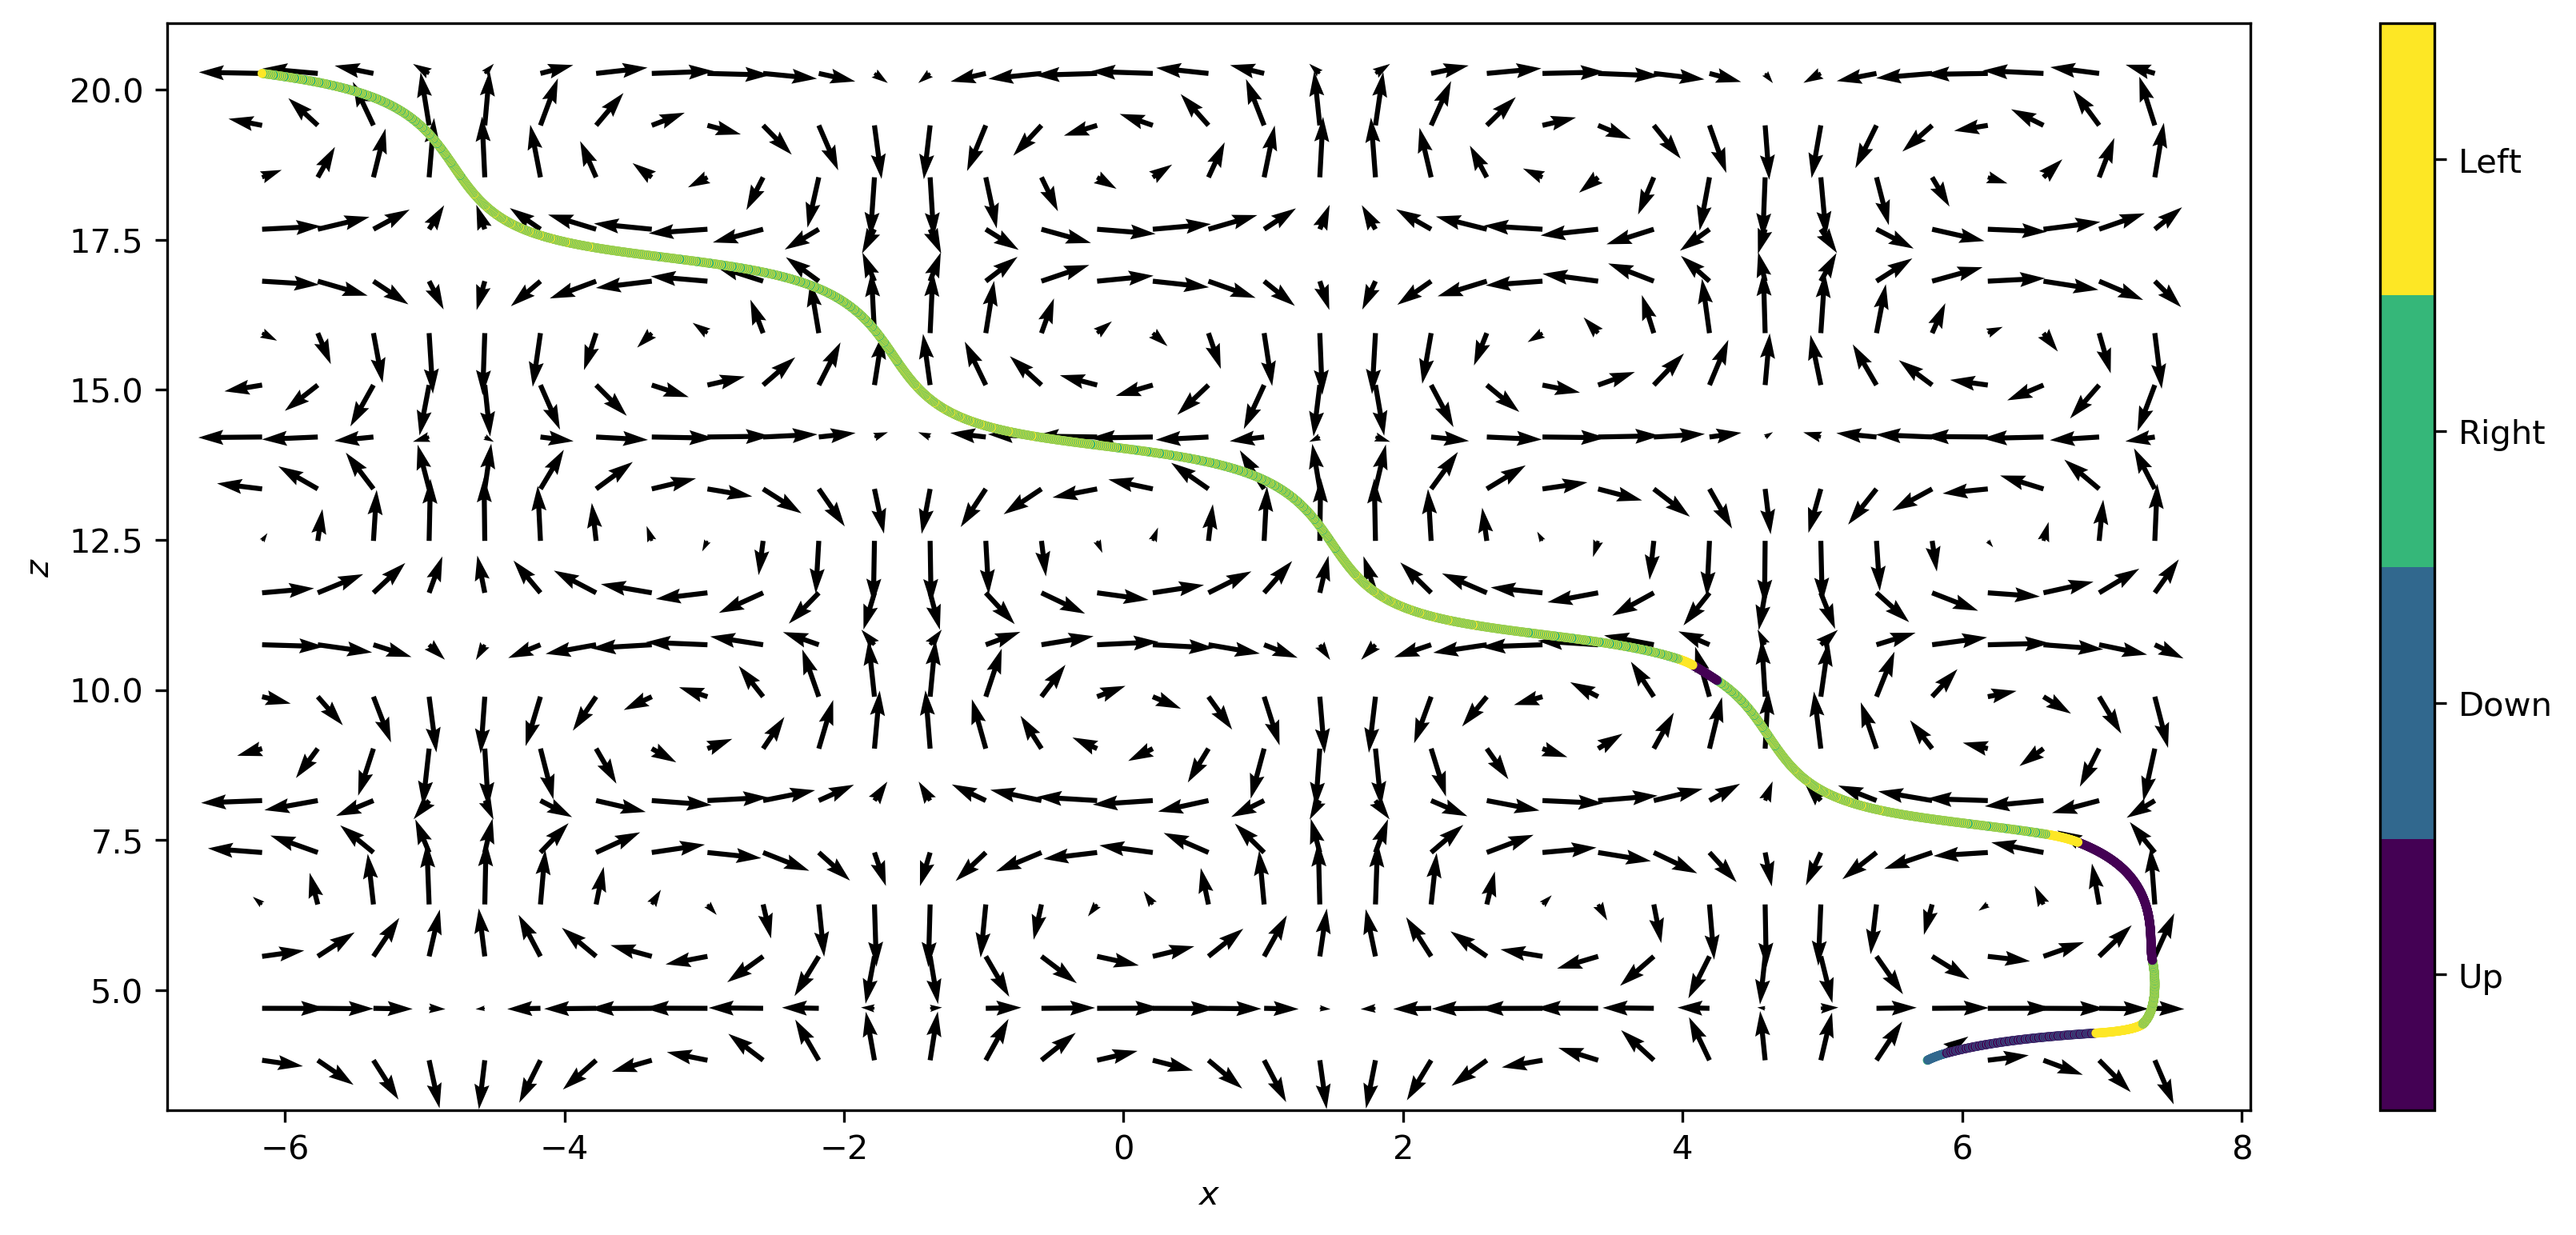

In [65]:
# create underlying quiver plot
plt.figure(figsize=(14,6))
history_X = np.array(smart.history_X_total)
x = np.linspace(np.min(history_X[1:,0]), np.max(history_X[1:,0]), 35)
z = np.linspace(np.min(history_X[1:,1]), np.max(history_X[1:,1]), 20)
X, Z = np.meshgrid(x, z)
ux, uz, w = tgv(X, Z)
plt.quiver(X, Z, ux, uz)

# create scatter plot for policy
cmap = plt.get_cmap('viridis', 4)
ax = plt.scatter(history_X[1:,0], history_X[1:,1],s=3,c=chosen_actions[:], cmap=cmap, \
                 vmin = -.5, vmax = 3.5)
cbar = plt.colorbar(ticks=np.arange(0,4))
cbar.ax.set_yticklabels(['Up', 'Down', 'Right','Left']) 
plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.savefig("Figures/" + directory_name + "/final-ep-actions.pdf", format="pdf", bbox_inches="tight")
plt.show()

Most of these actions make sense besides the fact that the particle finds it best to stear towards the right once it's at its steady state trajectory, mvoing between the center of vortices. To help understand this we can visualize its orientation during all of this:

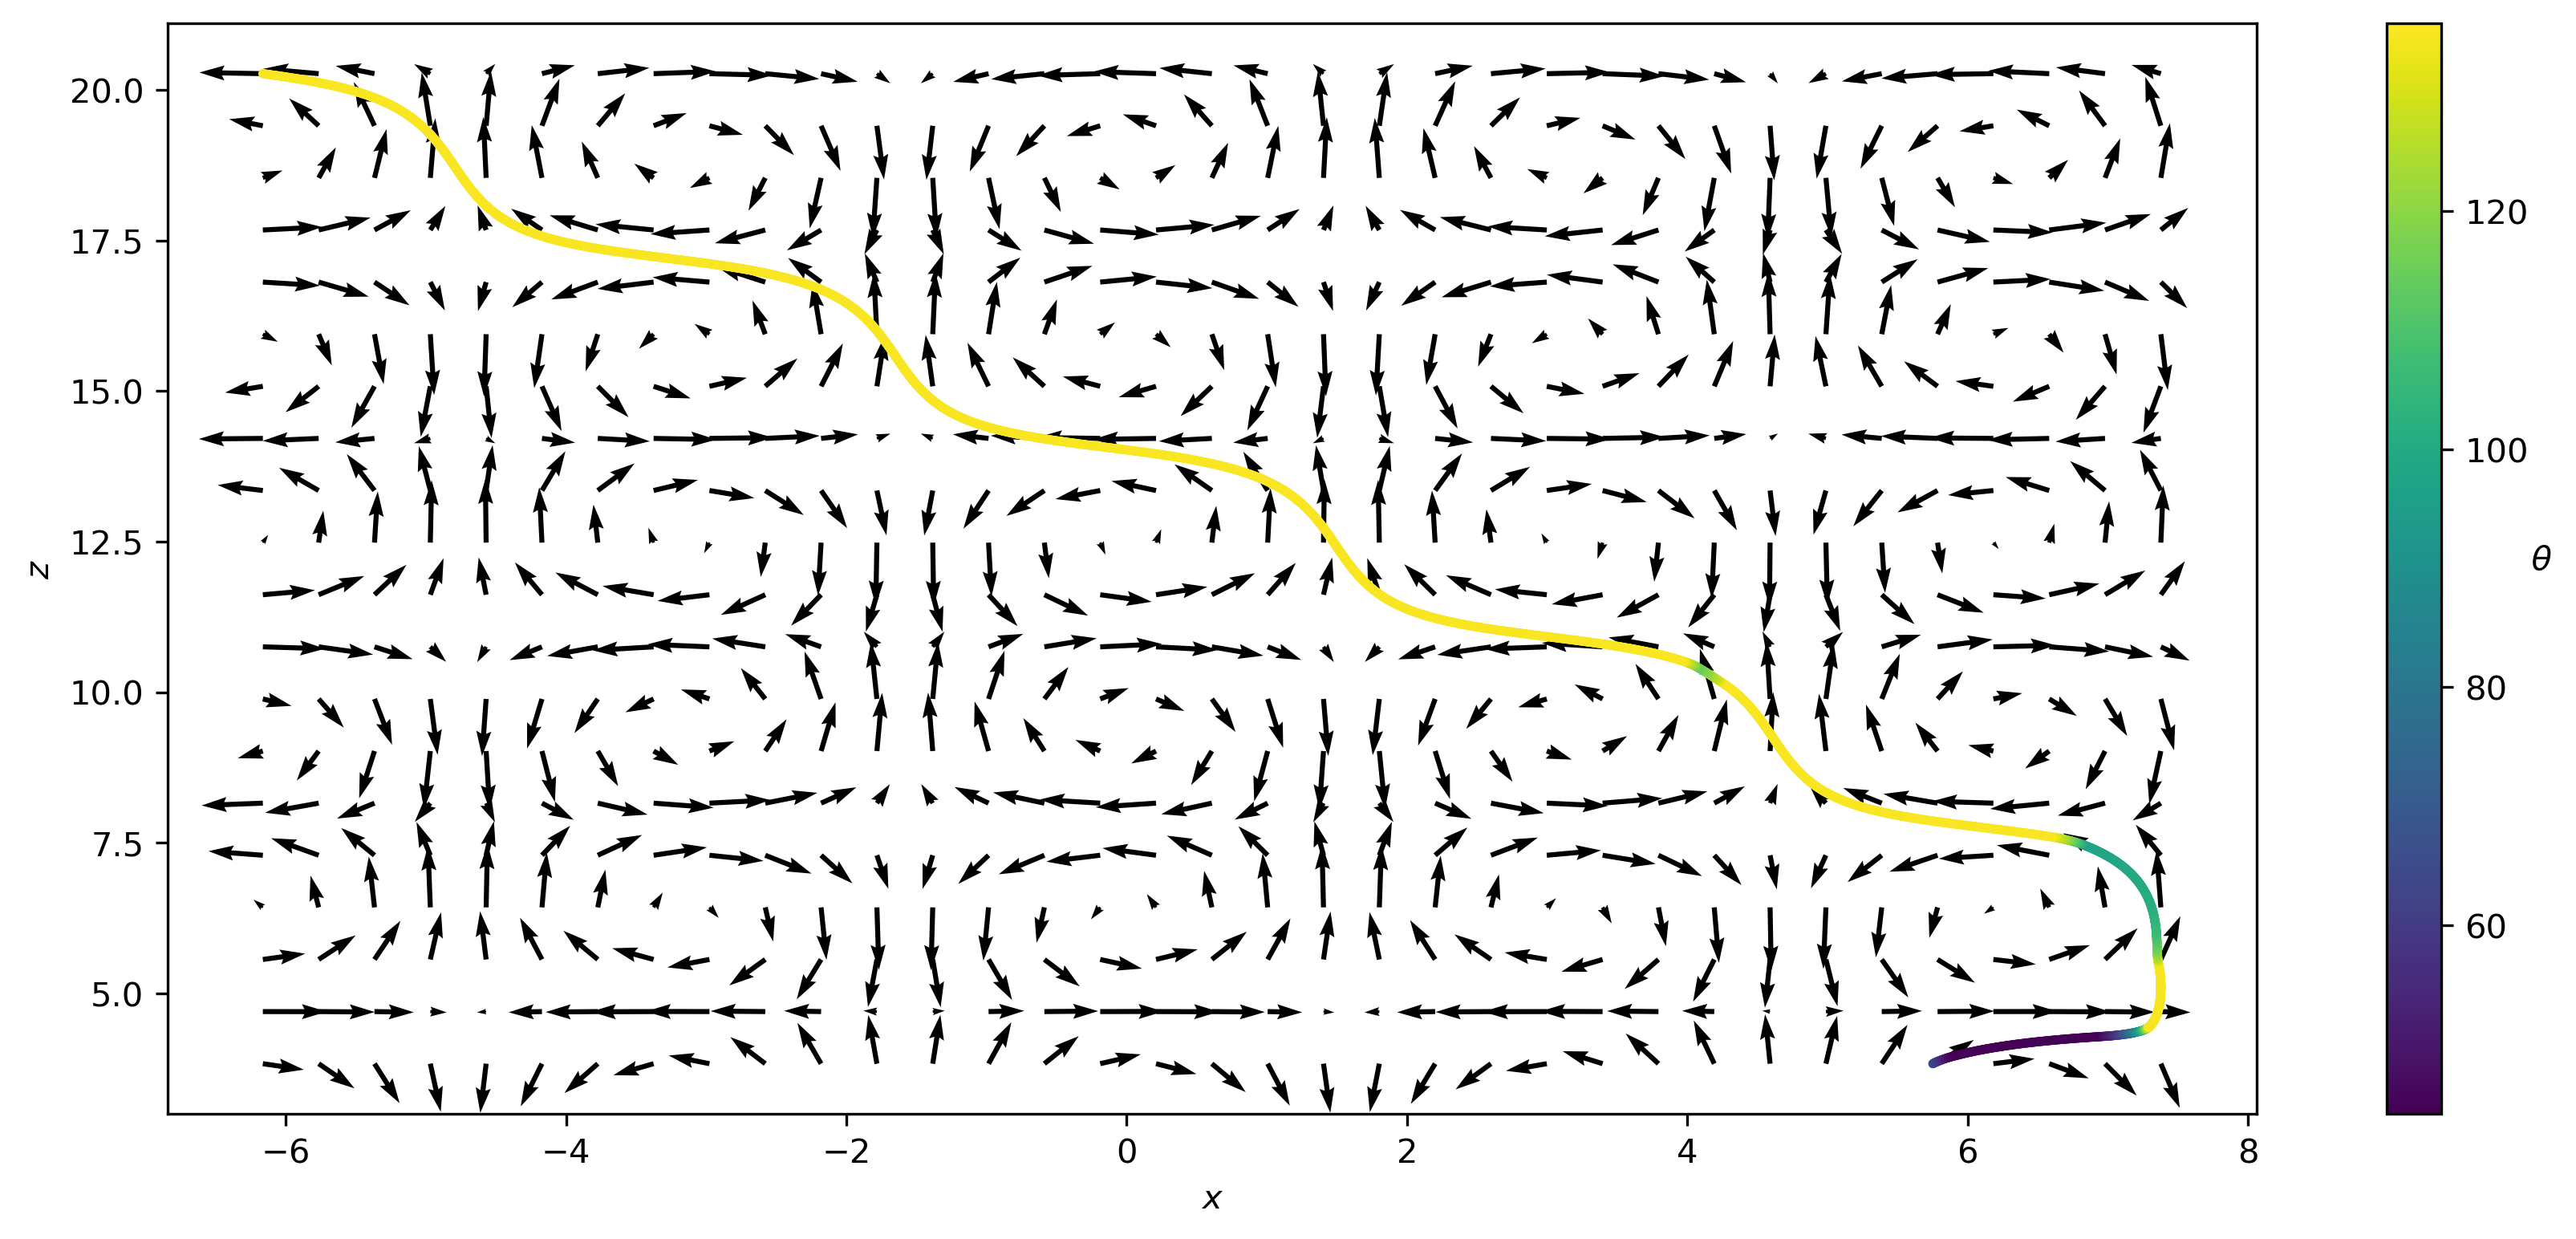

In [81]:
# create underlying quiver plot
plt.figure(figsize=(14,6))
history_X = np.array(smart.history_X_total)
x = np.linspace(np.min(history_X[1:,0]), np.max(history_X[1:,0]), 35)
z = np.linspace(np.min(history_X[1:,1]), np.max(history_X[1:,1]), 20)
X, Z = np.meshgrid(x, z)
ux, uz, w = tgv(X, Z)
plt.quiver(X, Z, ux, uz)

# create scatter plot for policy
ax = plt.scatter(history_X[1:,0], history_X[1:,1],s=3,c=theta_history[:]/np.pi*180)
cbar = plt.colorbar()
cbar.set_label(r'$\theta$',rotation=180)
plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.savefig("Figures/" + directory_name + "/final-ep-theta.pdf", format="pdf", bbox_inches="tight")
plt.show()

From this plot we see that somehow the combination of trying to steer rightward while drifting between the center of vortices allows to particle to main an orientation pointed to the left and upward, enabling it to climb to further elavations. 